### **死亡者数からわかる災害の危険性**

今回の調査で過去の地域・年・種類ごとの災害による死亡者数を調べて、災害に対する傾向をつかみ、
災害の危険性を理解したいと思いました。

※コード制作などにChatGPTを活用しました。

#### **チャレンジ1: 国ごとの死亡者数を可視化**

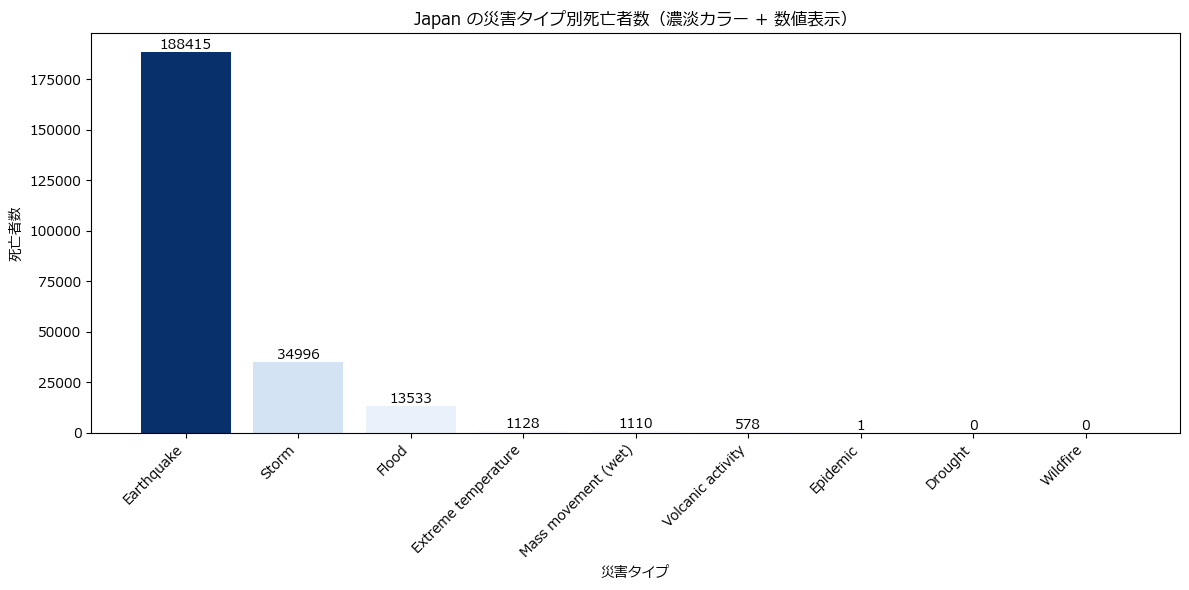

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.rcParams["font.family"] = "Meiryo"  # 日本語フォント

def plot_disaster_deaths_by_country(csv_path):
    """
    ユーザーが入力した国の災害タイプ別死亡者数を
    棒グラフで可視化し、数値表示・濃淡カラーを付ける
    """

    # 国名入力
    country_name = input("国名を入力してください (例: Japan): ")

    # CSV 読み込み
    df = pd.read_csv(csv_path)

    # 国名でフィルタ
    df_country = df[df["Country"] == country_name]

    if df_country.empty:
        print(f"国名 '{country_name}' のデータが見つかりません。")
        return

    # 災害タイプごとの死亡者数合計
    deaths_by_type = (
        df_country.groupby("Disaster Type")["Total Deaths"]
        .sum()
        .sort_values(ascending=False)
    )

    # カラーマップ（Blues）を使用して濃淡を作成
    values = deaths_by_type.values
    norm = (values - values.min()) / (values.max() - values.min() + 1e-9)
    colors = cm.Blues(norm)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(deaths_by_type.index, values, color=colors)

    # ---- 棒の上に数値を表示 ----
    for bar, val in zip(bars, values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{int(val)}",
            ha="center",
            va="bottom",
            fontsize=10
        )

    plt.xticks(rotation=45, ha="right")
    plt.title(f"{country_name} の災害タイプ別死亡者数（濃淡カラー + 数値表示）")
    plt.xlabel("災害タイプ")
    plt.ylabel("死亡者数")
    plt.tight_layout()
    plt.show()


# 実行例
csv_path = r"C:\Users\shunk\Downloads\emdat (2).csv"
plot_disaster_deaths_by_country(csv_path)


#### ***グラフの工夫***

国名を入力することで、国別の災害タイプ別死亡者数がわかるようにしました。
見やすいように数が多い所は色を濃くし、棒グラフに数を表示しました。

#### ***このコードのまとめ（簡潔）***

このコードは：

・CSVから指定した国の災害データを取り出し

・災害タイプ別に死亡者数を合計し

・死亡者数が多いほど濃い色の棒グラフを描き

・棒の上に人数を表示する

というグラフ可視化ツールです。

#### **チャレンジ2: 2つの国の死亡者数を比較**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Meiryo"  # 日本語フォント

def compare_disaster_deaths_by_country(csv_path):
    """
    指定した2つの国の災害タイプ別死亡者数を比較して可視化し、
    棒グラフの上に数値を表示する関数
    """

    # CSV読み込み
    df = pd.read_csv(csv_path)

    # 必要列チェック
    required_columns = ['Country', 'Disaster Type', 'Total Deaths']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"CSV に '{col}' 列がありません。")

    # 国名入力
    country1 = input("1つ目の国名を入力してください: ").strip()
    country2 = input("2つ目の国名を入力してください: ").strip()

    # データ抽出
    df1 = df[df["Country"] == country1]
    df2 = df[df["Country"] == country2]

    if df1.empty:
        print(f"⚠ データに '{country1}' が見つかりませんでした。")
        return
    if df2.empty:
        print(f"⚠ データに '{country2}' が見つかりませんでした。")
        return

    # 集計
    deaths1 = df1.groupby("Disaster Type")["Total Deaths"].sum()
    deaths2 = df2.groupby("Disaster Type")["Total Deaths"].sum()

    # 災害タイプ統一
    all_types = sorted(set(deaths1.index) | set(deaths2.index))
    y1 = [deaths1.get(t, 0) for t in all_types]
    y2 = [deaths2.get(t, 0) for t in all_types]

    # グラフ作成
    x = np.arange(len(all_types))
    width = 0.35

    plt.figure(figsize=(15, 7))
    bars1 = plt.bar(x - width/2, y1, width, label=country1)
    bars2 = plt.bar(x + width/2, y2, width, label=country2)

    # 数値ラベル追加
    for bar in bars1:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=9
        )

    for bar in bars2:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=9
        )

    plt.xticks(x, all_types, rotation=45, ha='right')
    plt.ylabel("死亡者数")
    plt.title(f"災害タイプ別死亡者数比較: {country1} vs {country2}")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ===== 実行 =====
# compare_disaster_deaths_by_country(r"C:\Users\shunk\Downloads\emdat (2).csv")


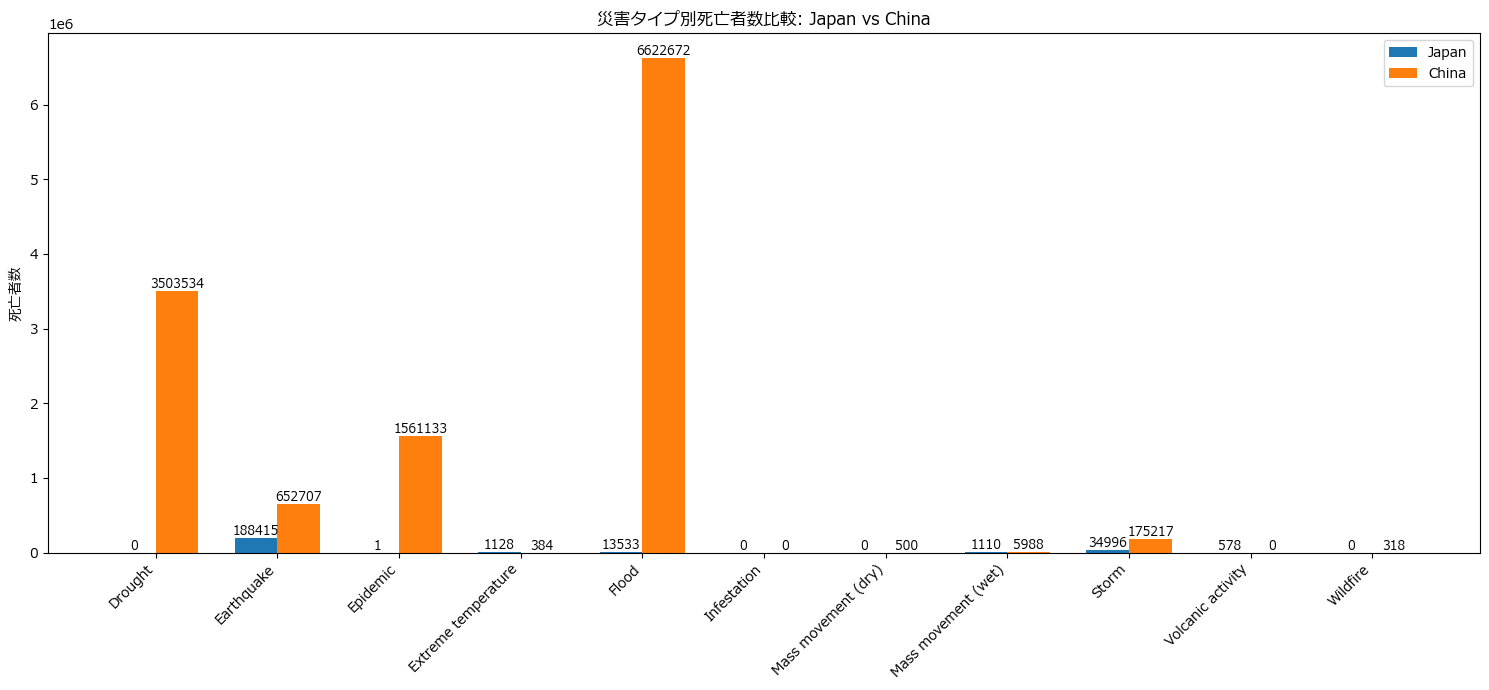

In [26]:
compare_disaster_deaths_by_country(r"C:\Users\shunk\Downloads\emdat (2).csv")


#### ***グラフの工夫***

2つの国名を入力することで、国別の災害タイプ別死亡者数の比較ができるようにしました。
見やすいように国別に色を分け、棒グラフに数を表示しました。

#### ***このコードのまとめ（簡潔）***

➀CSV（emdat）を読み込む
国名・災害タイプ・死亡者数のデータを取得。

➁ユーザーに国名を2つ入力してもらう

➂その2つの国について、災害タイプごとに死亡者数を合計する

➃棒グラフを描く

・左に1つ目の国

・右に2つ目の国

・災害タイプ別に並べる

➄棒の上に“死亡者数の数字”を表示する

➅見やすいタイトル・凡例をつけてグラフを表示

➆２個目の短いコードで関数を実行して、グラフを作る処理を開始している

#### **チャレンジ3: もっとも致命的な災害トップNを年別に可視化**

In [27]:
import pandas as pd

csv_path = r"C:\Users\shunk\Downloads\emdat (2).csv"
df = pd.read_csv(csv_path)

# CSVにある全ての列名を確認
print(df.columns.tolist())


['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO', 'Country', 'Subregion', 'Region', 'Latitude', 'Longitude', 'Start Year', 'Total Deaths']


In [40]:
import pandas as pd

csv_path = r"C:\Users\shunk\Downloads\emdat (2).csv"
df = pd.read_csv(csv_path)
print(df.columns)


Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Country', 'Subregion', 'Region', 'Latitude', 'Longitude', 'Start Year',
       'Total Deaths'],
      dtype='object')


In [34]:
import pandas as pd

csv_path = r"C:\Users\shunk\Downloads\emdat (2).csv"
df = pd.read_csv(csv_path)

if "Disaster Type" in df.columns:
    disaster_types = df["Disaster Type"].dropna().unique()
    print(f"災害タイプの種類数: {len(disaster_types)}")
    print("種類一覧:", disaster_types)
else:
    print("Disaster Type 列が見つかりません。")


災害タイプの種類数: 15
種類一覧: ['Storm' 'Flood' 'Epidemic' 'Volcanic activity' 'Earthquake' 'Drought'
 'Mass movement (dry)' 'Mass movement (wet)' 'Wildfire' 'Infestation'
 'Extreme temperature' 'Fog' 'Impact' 'Animal incident'
 'Glacial lake outburst flood']


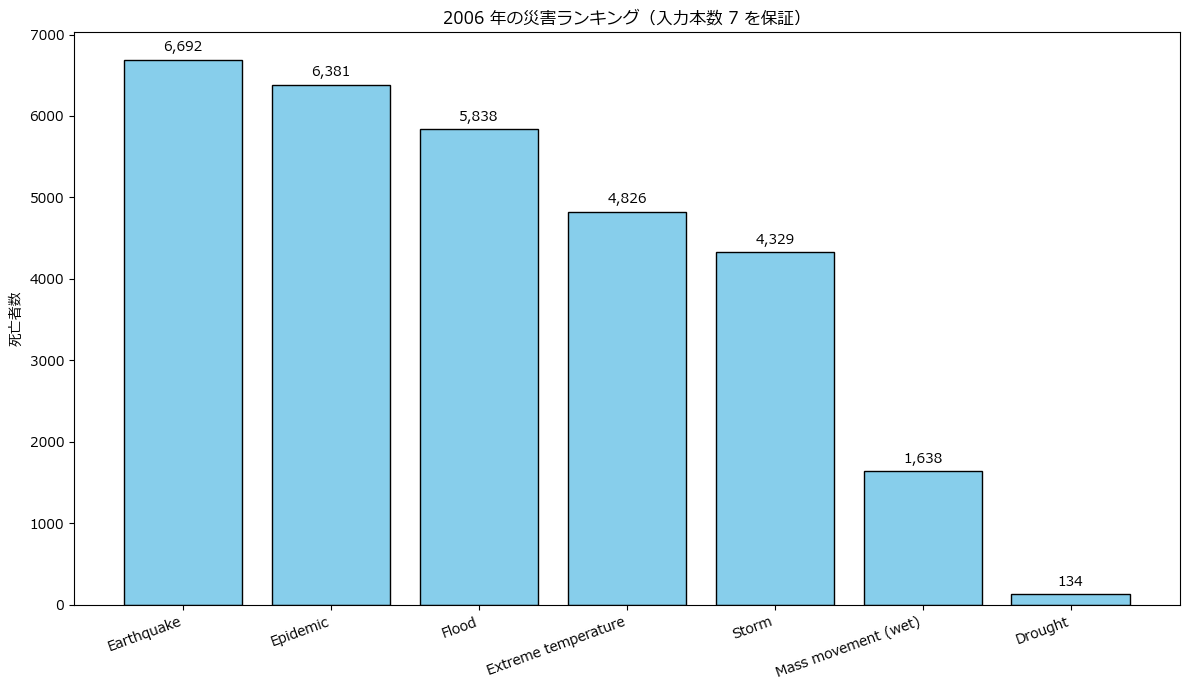

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Meiryo"  # 日本語フォント

def plot_deadliest_disasters_by_year(csv_path, year, top_n=5):
    """
    災害タイプごとに死亡者数を合計し、上位 top_n 件を棒グラフで表示。
    データ不足の場合はダミー行で補完。
    """
    df = pd.read_csv(csv_path)

    # 列名マッピング
    col_map = {
        "year": "Start Year",
        "type": "Disaster Type",
        "dead": "Total Deaths",
    }

    # 数値変換
    df[col_map["dead"]] = pd.to_numeric(df[col_map["dead"]], errors="coerce").fillna(0)
    df[col_map["year"]] = pd.to_numeric(df[col_map["year"]], errors="coerce").fillna(0).astype(int)

    # 指定年でフィルタ
    df_year = df[df[col_map["year"]] == year]

    if df_year.empty:
        print(f"{year} 年のデータがありません。")
        df_top_n = pd.DataFrame({
            col_map["year"]: [year] * top_n,
            col_map["type"]: ["データなし"] * top_n,
            col_map["dead"]: [0] * top_n
        })
    else:
        # 同じ災害タイプを合算
        df_grouped = df_year.groupby(col_map["type"], as_index=False)[col_map["dead"]].sum()

        # 死亡者数で降順ソート
        df_top_n = df_grouped.sort_values(col_map["dead"], ascending=False).head(top_n)

        # top_n 未満の場合はダミー行で補完
        if len(df_top_n) < top_n:
            missing = top_n - len(df_top_n)
            dummy_rows = pd.DataFrame({
                col_map["year"]: [year] * missing,
                col_map["type"]: ["データなし"] * missing,
                col_map["dead"]: [0] * missing
            })
            df_top_n = pd.concat([df_top_n, dummy_rows], ignore_index=True)

    # x 軸の番号
    x = range(top_n)
    labels = df_top_n[col_map["type"]]

    # 棒グラフ描画
    plt.figure(figsize=(12, 7))
    bars = plt.bar(x, df_top_n[col_map["dead"]], color="skyblue", edgecolor="black")

    # 棒に数値表示
    for i, v in enumerate(df_top_n[col_map["dead"]]):
        plt.text(i, v + max(df_top_n[col_map["dead"]])*0.01, f"{int(v):,}", ha="center", va="bottom", fontsize=10)

    plt.xticks(x, labels, rotation=20, ha="right")
    plt.title(f"{year} 年の災害ランキング（入力本数 {top_n} を保証）")
    plt.ylabel("死亡者数")
    plt.tight_layout()
    plt.show()

    return df_top_n[[col_map["type"], col_map["dead"]]]

# ==========================
# 実行部
# ==========================
if __name__ == "__main__":
    csv_path = r"C:\Users\shunk\Downloads\emdat (2).csv"
    year = int(input("調べたい年を入力してください（例: 2020）>>> "))
    top_n = int(input("棒グラフの本数を入力してください（例: 5）>>> "))
    plot_deadliest_disasters_by_year(csv_path, year, top_n)


#### ***グラフの工夫***

年と一位からのデータの数Nを入力することで、年別の災害タイプ別死亡者数のtopNまでが表示できるようにしました。
また、見やすいように棒グラフに数を表示しました。
最初は棒グラフが重なったりして苦戦しました。

#### ***このコードのまとめ（簡潔）***

➀CSV を読み込む

➁Start Year が指定された年のデータだけを抽出

➂Total Deaths の多い順に並べる

➃上位 N 件を取得する（データが足りなければ "データなし" を追加）

➄棒グラフとして N 本を確実にプロット

➅棒の下に Disaster Type（災害タイプ）のラベルを表示

➆棒の上に死亡者数を数値で表示

➇最後に抽出したデータを返す

#### **チャレンジ4: 特定の年範囲での死亡者数を可視化**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 日本語フォント設定（Windows）
plt.rcParams["font.family"] = "Meiryo"


def plot_deaths_by_year_range(csv_path):
    """
    ユーザーが入力した年範囲に基づいて、
    年ごとの死亡者数合計を色分け棒グラフで可視化し、
    さらに棒の上に死亡者数を表示する。
    """

    # ===== 年範囲のユーザー入力 =====
    start_year = int(input("開始年を入力してください（例: 2000）: "))
    end_year = int(input("終了年を入力してください（例: 2010）: "))

    if start_year > end_year:
        print("エラー: 開始年が終了年より大きいです。")
        return

    # ===== CSV読み込み =====
    df = pd.read_csv(csv_path, encoding="utf-8")

    if "Start Year" not in df.columns or "Total Deaths" not in df.columns:
        print("CSV に 'Start Year' または 'Total Deaths' 列がありません。列名を確認してください。")
        return

    # ===== 年範囲の絞り込み =====
    df_range = df[(df["Start Year"] >= start_year) & (df["Start Year"] <= end_year)]

    if df_range.empty:
        print(f"{start_year}〜{end_year} の期間のデータが見つかりませんでした。")
        return

    # ===== 年ごとの死亡者数合計集計 =====
    df_yearly = df_range.groupby("Start Year")["Total Deaths"].sum().reset_index()

    # 色を年ごとにランダムで生成（見やすい）
    colors = plt.cm.tab20(np.linspace(0, 1, len(df_yearly)))

    # ===== グラフ描画 =====
    plt.figure(figsize=(12, 6))
    bars = plt.bar(df_yearly["Start Year"], df_yearly["Total Deaths"], color=colors)

    plt.xlabel("年（Start Year）")
    plt.ylabel("死亡者数")
    plt.title(f"{start_year}年〜{end_year}年の災害による死亡者数")
    plt.xticks(df_yearly["Start Year"], rotation=45)

    # ===== 棒の上に死亡者数を表示 =====
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height):,}",   # カンマ区切り
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.tight_layout()
    plt.show()


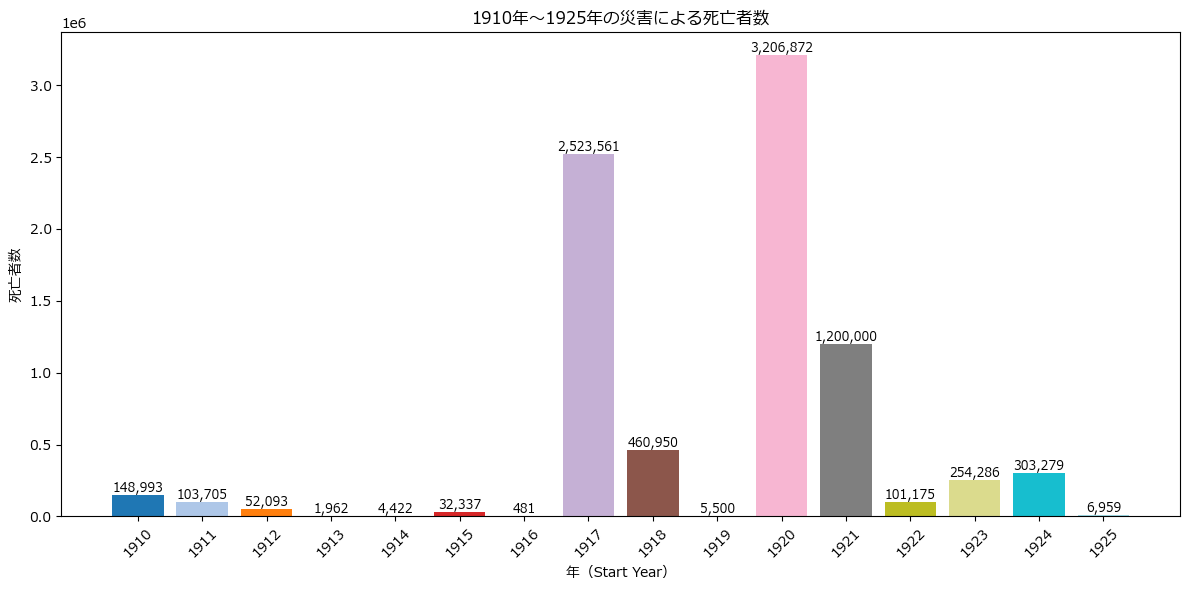

In [59]:
plot_deaths_by_year_range(r"C:\Users\shunk\Downloads\emdat (2).csv")


#### ***グラフの工夫***

特定の年の範囲を入力することで、その範囲内の年別の災害による死亡者数を棒グラフで表示できるようにしました。
また、見やすいように棒グラフに数を表示し、年別に色分けも行いました。

#### ***このコードのまとめ（簡潔）***

➀ユーザーに開始年と終了年を入力させる

➁CSV を読み込み、
「Start Year」と「Total Deaths」から必要なデータだけ取り出す

➂指定した年範囲内で、年ごとの死亡者数合計を計算

➃棒グラフを描く

・各年を違う色（カラーマップ）で表示

・死亡者数を棒の上に数値で表示

➄グラフを画面に表示

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 日本語フォント設定（Windows）
plt.rcParams["font.family"] = "Meiryo"


def plot_deaths_by_year_and_type(csv_path):
    """
    年ごとの災害タイプ別死亡者数を積み上げ棒グラフで可視化し、
    重ならないように数値表示を調整したバージョン。
    """

    # ===== 年入力 =====
    start_year = int(input("開始年（例: 2000）: "))
    end_year = int(input("終了年（例: 2010）: "))

    if start_year > end_year:
        print("開始年が終了年より大きいです。")
        return

    # ===== CSV読込 =====
    df = pd.read_csv(csv_path)

    required_cols = ["Start Year", "Disaster Type", "Total Deaths"]
    if not all(col in df.columns for col in required_cols):
        print("必要な列がありません（Start Year, Disaster Type, Total Deaths）")
        return

    # ===== 年範囲で抽出 =====
    df_range = df[(df["Start Year"] >= start_year) & (df["Start Year"] <= end_year)]
    if df_range.empty:
        print("該当範囲のデータがありません")
        return

    # ===== ピボット作成 =====
    pivot_df = df_range.pivot_table(
        index="Start Year",
        columns="Disaster Type",
        values="Total Deaths",
        aggfunc="sum",
        fill_value=0
    )

    disaster_types = pivot_df.columns.tolist()

    # ===== 描画 =====
    fig, ax = plt.subplots(figsize=(14, 7))

    colors = plt.cm.tab20(np.linspace(0, 1, len(disaster_types)))

    bottom = np.zeros(len(pivot_df))

    for idx, dtype in enumerate(disaster_types):
        values = pivot_df[dtype].values
        bars = ax.bar(pivot_df.index, values, bottom=bottom, color=colors[idx], label=dtype)

        # 合計値（小さい数字の判定に使う）
        total_per_year = pivot_df.sum(axis=1).values

        # ===== 数字表示（重なり対策） =====
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if height == 0:
                continue

            # ★ 全体に対する割合が 5% 以下なら数字非表示 → 重なり防止
            if height < total_per_year[i] * 0.05:
                continue

            # テキストの位置（中央ではなく “少し上”）
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height * 0.7,
                f"{int(height):,}",
                ha='center',
                va='center',
                fontsize=8,
                color="white" if np.mean(colors[idx][:3]) < 0.5 else "black"  # 色に応じて白/黒自動
            )

        bottom += values

    # ===== グラフ設定 =====
    ax.set_xlabel("年（Start Year）")
    ax.set_ylabel("死亡者数")
    ax.set_title(f"{start_year}年〜{end_year}年 災害タイプ別死亡者数（積み上げ棒グラフ）")
    ax.legend(title="Disaster Type", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


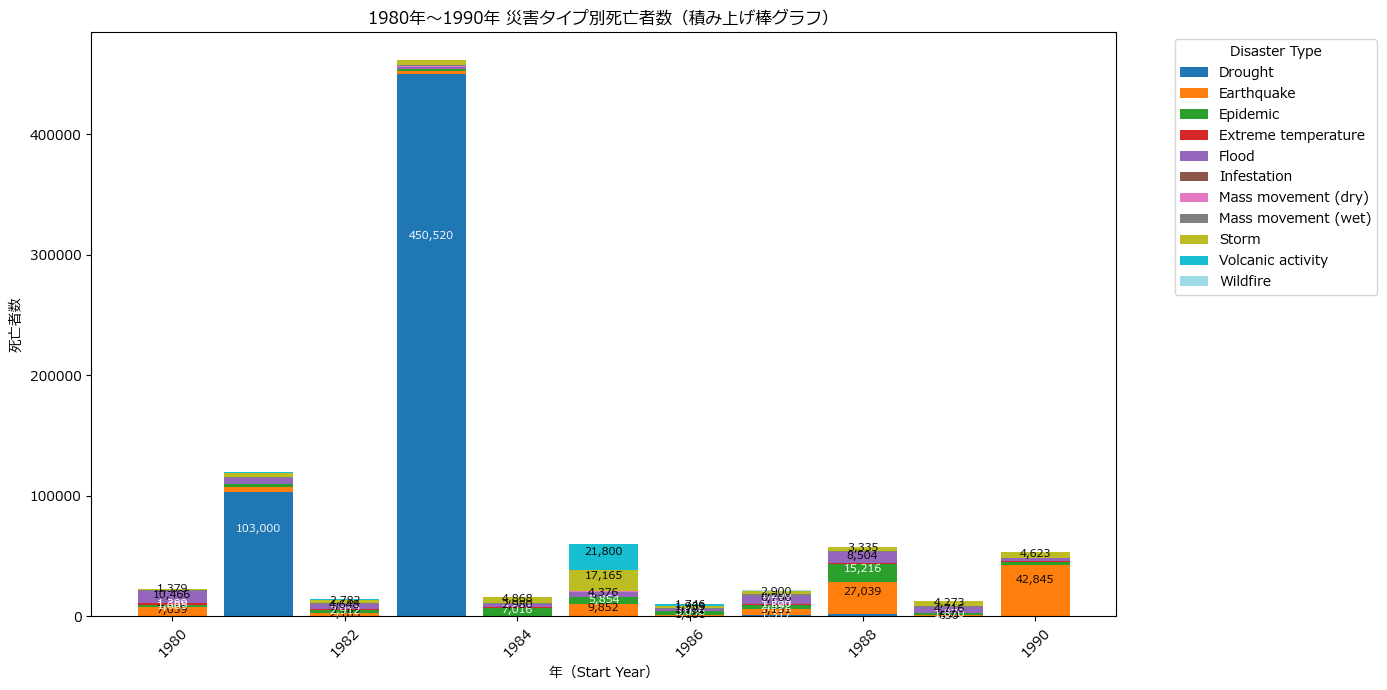

In [69]:
plot_deaths_by_year_and_type(r"C:\Users\shunk\Downloads\emdat (2).csv")


#### ***グラフの工夫***

特定の年の範囲を入力することで、その範囲内の年別の災害による死亡者数を棒グラフで表示できるようにしました。
また、積み上げ棒グラフにし、どの災害による死亡者数が多いのかを見やすいように災害別に色分けと数を表示しました。

#### ***このコードのまとめ（簡潔）***

➀CSV を読み込み、ユーザーが入力した年範囲のデータだけ抽出する

・Start Year

・Disaster Type

・Total Deaths

を使用。

➁年 × 災害タイプ別に死亡者数を集計する（ピボットテーブル）

➂積み上げ棒グラフとして描画する

・年ごとに棒

・災害タイプが積み上げ

➃各積み上げ部分に数字を表示するが、重ならないように制御

・小さい値は非表示にする（全体の 5% 以下）

・文字の位置調整

・色に合わせて文字色を自動で白 or 黒に変更

➄グラフを表示

#### **チャレンジ5: カスタム可視化を作成**

In [3]:
import pandas as pd
import folium

# CSV 読み込み
file_path = r"C:\Users\shunk\Downloads\emdat (2).csv"
df = pd.read_csv(file_path)

# -------------------------
# 緯度・経度列の自動検出
# -------------------------
lat_candidates = ["Latitude", "latitude", "LAT", "lat", "Lat"]
lon_candidates = ["Longitude", "longitude", "LON", "lon", "Long", "LONG", "Lon"]

lat_col = next((c for c in lat_candidates if c in df.columns), None)
lon_col = next((c for c in lon_candidates if c in df.columns), None)

if lat_col is None or lon_col is None:
    raise ValueError("緯度・経度の列が見つかりませんでした。")

df = df.dropna(subset=[lat_col, lon_col])

# -------------------------------------------------------
# 災害名をどの列から取得するか判断するロジック
# -------------------------------------------------------
name_candidates = [
    "Event Name", "Event_Name", "event name", 
    "Disaster Subtype", "Disaster_Subtype", "Subtype", 
    "Disaster Type", "Type"
]

valid_name_cols = [c for c in name_candidates if c in df.columns]

def get_disaster_name(row):
    for col in valid_name_cols:
        name = row.get(col)
        if pd.notna(name):
            return str(name)
    if "Disaster Type" in df.columns:
        return str(row["Disaster Type"])
    return "Unknown Disaster"

# -------------------------
# 死亡者数の列を自動検出
# -------------------------
death_candidates = ["Total Deaths", "total deaths", "Deaths", "Death", "Killed"]

death_col = next((c for c in death_candidates if c in df.columns), None)

if death_col is None:
    raise ValueError("死亡者数の列が見つかりません（Total Deaths が一般的です）。")

# 数値化（文字列でもOKにする）
df[death_col] = pd.to_numeric(df[death_col], errors="coerce").fillna(0).astype(int)

# -------------------------
# 災害種類ごとに色設定
# -------------------------
if "Disaster Type" in df.columns:
    disaster_types = df["Disaster Type"].fillna("Unknown").unique()
else:
    disaster_types = ["Unknown"]

colors = [
    "blue","green","purple","orange","darkred","lightred",
    "beige","darkblue","darkgreen","cadetblue","darkpurple",
    "pink","lightblue","lightgreen","gray","black"
]

color_map = {d: colors[i % len(colors)] for i, d in enumerate(disaster_types)}

# -------------------------
# 地図中心
# -------------------------
center_lat = df[lat_col].astype(float).mean()
center_lon = df[lon_col].astype(float).mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# =======================================================
# 地点ごとにマーカー追加
# 死亡者数 1000 以上 → 強調表示（赤色 + 大きいマーカー）
# =======================================================
threshold = 1000

for _, row in df.iterrows():

    disaster_name = get_disaster_name(row)
    disaster_type = row.get("Disaster Type", "Unknown")
    country = row.get("Country", "N/A")
    year = row.get("Start Year", "N/A")
    deaths = row.get(death_col, 0)

    # ---- ポップアップ文 ----
    popup_text = ""

    # 強調表示（死亡者が閾値以上）
    if deaths >= threshold:
        popup_text += "<b>⚠ High Fatality Event!</b><br><br>"

    popup_text += (
        f"<b>災害名:</b> {disaster_name}<br>"
        f"<b>災害種類:</b> {disaster_type}<br>"
        f"<b>国:</b> {country}<br>"
        f"<b>発生年:</b> {year}<br>"
        f"<b>死亡者数:</b> {deaths:,} 人"
    )

    # ---- マーカー設定 ----
    if deaths >= threshold:
        # 強調（赤色）
        marker_color = "red"
        marker_radius = 8
    else:
        marker_color = color_map.get(disaster_type, "gray")
        marker_radius = 4

    folium.CircleMarker(
        location=[float(row[lat_col]), float(row[lon_col])],
        radius=marker_radius,
        popup=popup_text,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.85
    ).add_to(m)

# -------------------------
# 出力
# -------------------------
output_path = r"C:\Users\shunk\Downloads\emdat_map_with_deaths.html"
m.save(output_path)

print("➡ 地図を出力しました:", output_path)


➡ 地図を出力しました: C:\Users\shunk\Downloads\emdat_map_with_deaths.html


In [13]:
import webbrowser
import os

# ファイルパス
file_path = r"C:\Users\shunk\Downloads\emdat_map_with_deaths.html"

# 絶対パスに変換
file_path = os.path.abspath(file_path)

# ブラウザで開く
webbrowser.open(f"file://{file_path}")


True

↑実行すると地図が開きます

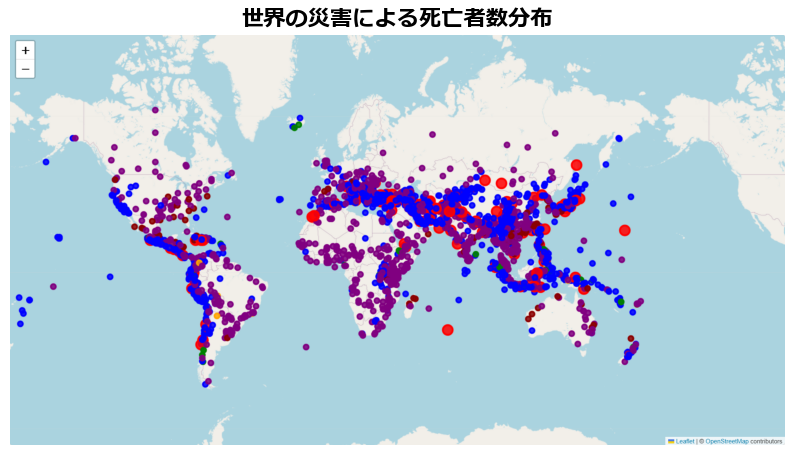

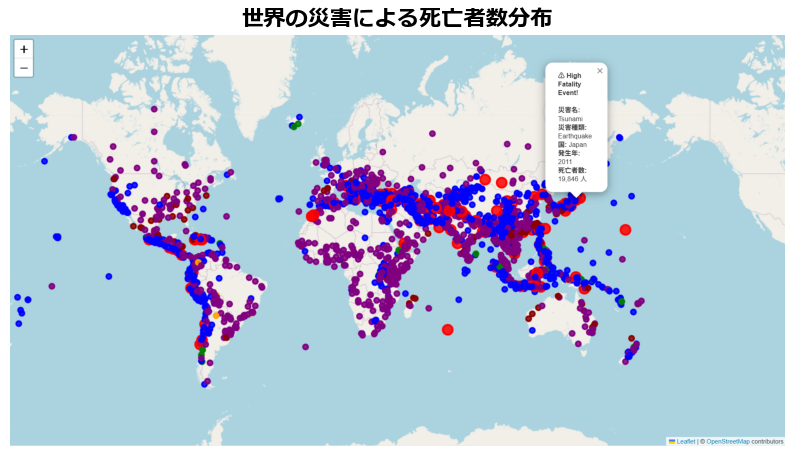

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 表示したい画像ファイルのパス
img_paths = [
    r"C:\Users\shunk\OneDrive - 学校法人　廣池学園\画像\スクリーンショット\スクリーンショット 2025-12-03 230559.png",
    r"C:\Users\shunk\OneDrive - 学校法人　廣池学園\画像\スクリーンショット\スクリーンショット 2025-12-03 230645.png"
]

for path in img_paths:
    img = mpimg.imread(path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')  # 軸非表示で余白スッキリ
    plt.title("世界の災害による死亡者数分布", fontsize=16, weight='bold')  # タイトル追加
    plt.show()


#### ***グラフの工夫***

foliumで地図を作成しました。地図には災害名・災害種類・国名・発生年・死亡者数が表示されるようにしました。
また、死亡者数 1,000 以上の災害を強調表示するために、赤色の大きなマーカーで示し、それ以外は災害タイプごとの色分け で、地図上でどの種類の災害かが一目でわかるようになるようにしました。

#### ***このコードのまとめ（簡潔）***

➀CSV 読み込み

emdat (2).csv から災害データを読み込み、緯度・経度、災害名、災害タイプ、死亡者数などの列を自動判定。

➁データ整形

・緯度・経度が欠損している行を除外

・死亡者数を数値化

➂災害種類ごとに色分け

災害タイプごとに異なる色を割り当て、地図上でわかりやすく表示。

➃folium で地図作成

・地図の中心をデータの平均位置に設定

・各災害の位置にマーカー（CircleMarker）を追加

➄死亡者数による強調

・死亡者数が 1,000 人以上の災害は赤色で大きく表示

・ポップアップに「⚠ High Fatality Event!」と表示

・それ以外は災害タイプごとの色で表示

➅マーカーに情報表示
ポップアップで災害名・種類・国・発生年・死亡者数を表示。

➆HTML ファイルとして出力

C:\Users\shunk\Downloads\emdat_map_with_deaths.html に保存し、ブラウザで開くことでインタラクティブに確認可能。

### **まとめ**

災害の中でも地震による死亡者数が圧倒的に多かったです。
今回の調査で、地震の脅威・災害の脅威を改めて実感しました。

自分自身で調べたい国や範囲について決められるようにしたので、活用しやすい図になったと思います。

チャレンジ5の地図作成は前の課題で利用したもののデータを少し変えただけなので、そんなに苦戦はしませんでしたが、
チャレンジ3の図が棒グラフが重なってしまい訂正するのに苦戦しました。

今回もChatGPTにコードは作成してもらいましたが、前よりも丁寧に説明をして、前よりも良いものになったと思います。